In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import PolynomialFeatures, LabelEncoder, StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn import tree

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Regression  
regresi adalah contoh dari model supervised dan continuous data

## EDA

In [3]:
df = pd.read_csv('D:\Data Analytics\Project\data_science_learning\dataset\insurance.csv')

In [5]:
display(df.info())
display(df.describe().T)
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


None

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


c:\Users\Roy Andhika\miniconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


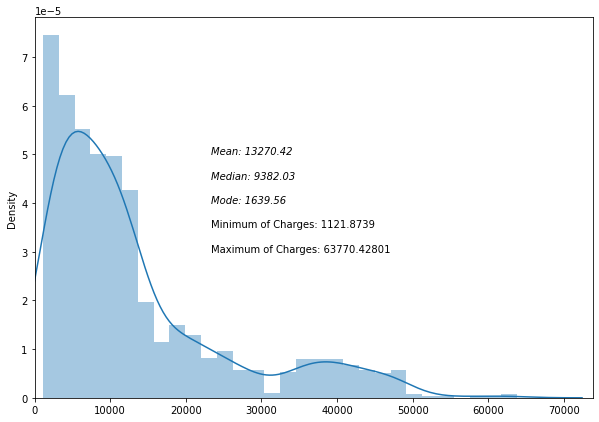

In [22]:
plt.figure(figsize = (10,7))
sns.distplot(x = df['charges'])

plt.text(df['charges'].mean() + 10000, 0.00005, "Mean: "+ str(round(df['charges'].mean(),2)), style='italic', fontsize=10)
plt.text(df['charges'].mean() + 10000, 0.000045, "Median: "+ str(round(df['charges'].median(),2)), style='italic', fontsize=10)
plt.text(df['charges'].mean() + 10000, 0.00004, "Mode: "+ str(round(df['charges'].mode()[0],2)), style='italic', fontsize=10)
plt.text(df['charges'].mean() + 10000, 0.000035, "Minimum of Charges: " + str(df['charges'].min()))
plt.text(df['charges'].mean() + 10000, 0.00003, "Maximum of Charges: " + str(df['charges'].max()))
plt.xlim([0, df['charges'].max()+10000])
plt.show()

<AxesSubplot:>

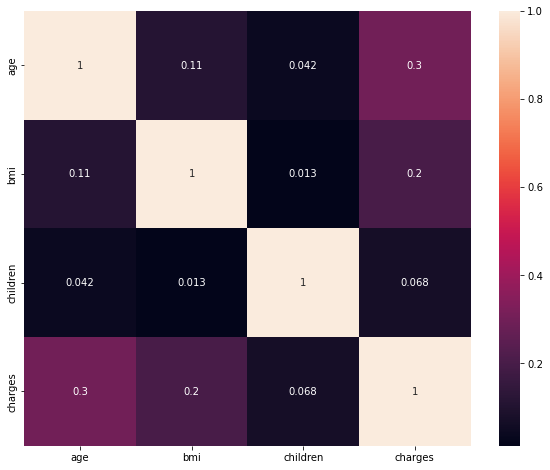

In [26]:
plt.figure(figsize = (10, 8))
sns.heatmap(df.corr(), annot=True)

## Preprocessing

In [27]:
def label_encoding(data):
  df_copy = data.copy()

  #find non numerical variable/field
  catcol = df_copy.select_dtypes(include=['object']).columns.to_list()

  #label encoder object
  label_encoding = LabelEncoder()

  #encode the data into a label
  for i in catcol :
    df_copy[i] = label_encoding.fit_transform(df_copy[i])

  return df_copy

In [30]:
df1 = label_encoding(df)
df1

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


## `1.` Simple Linear Regression

In [31]:
def benchmark(data, target, model):

  data_label_enc = label_encoding(data)

  X = data_label_enc.drop(columns=target)
  y = data_label_enc[target]

  #splitting data into training and testing data
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43)

  #modelling
  lr = model
  lr.fit(X_train, y_train)

  y_train_pred = lr.predict(X_train)
  y_test_pred = lr.predict(X_test)

  print('For training data ---------')
  print("Mean Absolute Error: {:.2f}".format(mean_absolute_error(y_train, y_train_pred)))
  print("Mean Squared Error: {:.2f}".format(mean_squared_error(y_train, y_train_pred)))
  print("R2 Score: {:.2f} \n".format(r2_score(y_train, y_train_pred)))

  print('For testing data ---------')
  print("Mean Absolute Error: {:.2f}".format(mean_absolute_error(y_test, y_test_pred)))
  print("Mean Squared Error: {:.2f}".format(mean_squared_error(y_test, y_test_pred)))
  print("R2 Score: {:.2f}".format(r2_score(y_test, y_test_pred)))

In [32]:
def print_coef(data, target, model):

  data_label_enc = label_encoding(data)

  X = data_label_enc.drop(columns=target)
  y = data_label_enc[target]

  #splitting data into training and testing data
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43)

  #modelling
  lr = model
  lr.fit(X_train, y_train)

  return lr.coef_

In [33]:
def ploting_the_coef(data, target, model):
  
  coef = print_coef(data, target, model)

  reg_coef = pd.DataFrame()
  reg_coef['columns'] = data.drop(target, axis=1).columns.to_list()
  reg_coef['coefficient'] = pd.Series(coef)
  display(reg_coef)
  
  fig, ax = plt.subplots(figsize=(12,7))
  ax.bar(reg_coef['columns'], reg_coef['coefficient'])

  ax.spines['bottom'].set_position('zero')

  plt.style.use('ggplot')
  plt.show()

In [34]:
benchmark(df, target='charges', model=LinearRegression())

For training data ---------
Mean Absolute Error: 4021.81
Mean Squared Error: 34956623.67
R2 Score: 0.76 

For testing data ---------
Mean Absolute Error: 4476.48
Mean Squared Error: 43047481.54
R2 Score: 0.69


In [35]:
print_coef(df, target='charges', model=LinearRegression())

array([  255.57614087,   124.96481438,   323.29163068,   497.49273342,
       23954.33378299,  -376.09558492])

,columns,coefficient
0,age,255.576141
1,sex,124.964814
2,bmi,323.291631
3,children,497.492733
4,smoker,23954.333783
5,region,-376.095585


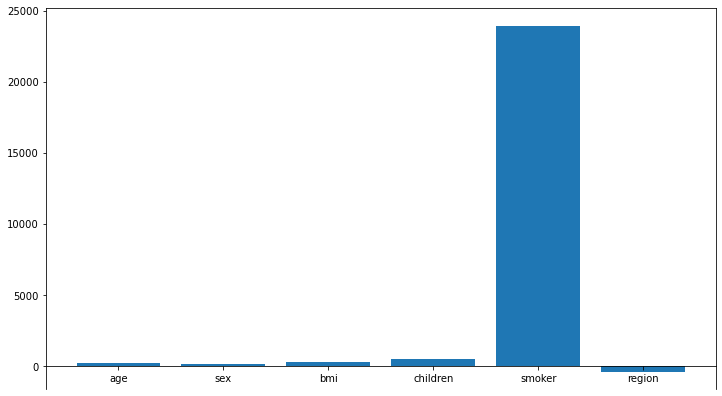

In [36]:
ploting_the_coef(df, target='charges', model=LinearRegression())